# SESSION 2: AGENT WITH BASIC PLANNING CAPABILITIES

In [1]:
import numpy as np
from random import choice,randint,shuffle,random

## Breadth-First Search Code

In [2]:
## COPY here the necessary code for BFS strategy

In [3]:
class search_node:
  def __init__(self, state, parent, action, path_cost):
    self.state  = state
    self.parent = parent
    self.action = action
    self.path_cost = path_cost

  def is_equal_to(self, node):
    return np.array_equal(self.state, node.state)


def create_successor(env, parent, action):

      state = env.execute(parent, action)

      #We assume that all actions has cost 1
      new_node = search_node(state, parent, action, parent.path_cost + 1)

      return new_node

## ALGORITHM BREADTH-FIRST SEARCH

def bfs(env, start_node, end_node):
  
  frontier = []
  visited  = []
  contador = 0

  frontier.append(start_node)

  while frontier:
    contador += 1
  # get the next node from the frontier
    node = frontier.pop(0) # this assumes a breadth-first search
  
  # check if the node has already been visited
    if str(node.state) in visited:
      continue
  
   # mark the node as visited
    visited.append(str(node.state))
  
    # check if the node is a goal
    if node.is_equal_to(end_node):
      return node, contador # return the node if it is a goal

    # expand the node and add its successors to the frontier
    for action in env.actions:
      if env.valid_action(node.state, action):
        child = create_successor(env, node, action)
        frontier.append(child)

  #No solution
  return None

def dfs(env, start_node, end_node):
  
  frontier = []
  visited  = []
  contador = 0

  frontier.append(start_node)

  while frontier:
    contador += 1
  # get the next node from the frontier
    node = frontier.pop(-1) # this assumes a breadth-first search
  
  # check if the node has already been visited
    if str(node.state) in visited:
      continue
  
   # mark the node as visited
    visited.append(str(node.state))
  
    # check if the node is a goal
    if node.is_equal_to(end_node):
      return node, contador # return the node if it is a goal

    # expand the node and add its successors to the frontier
    for action in env.actions:
      if env.valid_action(node.state, action):
        child = create_successor(env, node, action)
        frontier.append(child)

  #No solution
  return None
  
  frontier = []
  visited  = []

  frontier.append(start_node)

  while frontier:
  # get the next node from the frontier
    node = frontier.pop(0) # this assumes a breadth-first search
  
  # check if the node has already been visited
    if str(node.state) in visited:
      continue
  
   # mark the node as visited
    visited.append(str(node.state))
  
    # check if the node is a goal
    if node.is_equal_to(end_node):
      return node # return the node if it is a goal

    # expand the node and add its successors to the frontier
    for action in env.actions:
      if env.valid_action(node.state, action):
        child = create_successor(env, node, action)
        frontier.append(child)

  #No solution
  return None

# SEARCH

def cost_bfs(env, start_node, end_node):
  
  frontier = []
  visited  = []
  contador = 0

  frontier.append(start_node)

  while frontier:
    contador += 1
  # get the next node from the frontier
    frontier.sort(key = lambda x: x.path_cost)
    node = frontier.pop(0)
    
  
  # check if the node has already been visited
    if str(node.state) in visited:
      continue
  
   # mark the node as visited
    visited.append(str(node.state))
  
    # check if the node is a goal
    if node.is_equal_to(end_node):
      return node, contador # return the node if it is a goal

    # expand the node and add its successors to the frontier
    for action in env.actions:
      if env.valid_action(node.state, action):
        child = create_successor(env, node, action)
        frontier.append(child)

  #No solution
  return None

def search_path(env, Ini, End, type):

  start_node = search_node(Ini, None, None, 0)
  end_node   = search_node(End, None, None, 0)

  # SOLUTION 
  if type == "bfs":
    solution, cont = bfs(env, start_node, end_node)
  elif type == "dfs":
    solution, cont = dfs(env, start_node, end_node)
  elif type == "cost_bfs":
    solution, cont = cost_bfs(env, start_node, end_node)

  if solution:
    path = []
    while solution.parent:
      path = [solution.action] + path
      solution = solution.parent

    return [path, cont]
  else:
    return None


"""
# EXAMPLE OF USE (PROBLEM)

environment = Env(G, labels)
initial_state = "1"
final_state = "6"

# SOLUTION

plan = search_path(environment, initial_state, final_state)
print('Plan: ', plan)

"""

'\n# EXAMPLE OF USE (PROBLEM)\n\nenvironment = Env(G, labels)\ninitial_state = "1"\nfinal_state = "6"\n\n# SOLUTION\n\nplan = search_path(environment, initial_state, final_state)\nprint(\'Plan: \', plan)\n\n'

## AGENT IMPLEMENTATION

In [4]:
def randomObstacles(matrix, No):
  
  N = len(matrix)
  
  assert No <= N*N, "Too many obstacles to fit" # alternative checking 

  if No > N**2: 
      return False 

  obs_pos = np.random.choice(N*N, size = No, replace = False)
  #ravel flattens a 2D matrix into an 1D array, unravel is the inverse
  matrix[np.unravel_index(obs_pos,(N,N))] = 0
  
  return True

In [5]:
class Agent:

   def __init__(self, N: int, No: int):

      matrix =  np.ones((N,N))

      randomObstacles(matrix, No)

      self.KB = { "size": N,
                  "cells": matrix,
                  "pos": np.array([35,35])
              }

      self.actions = {"up":    [-1, 0],
                      "left":  [0, -1],
                      "right": [0,  1],
                      "down":  [1,  0] 
                    }
   
   def updateKB(self, percepts, action):
           
      self.KB["pos"] = self.KB["pos"] + action

   def valid(self, k, percept): #excution time
       a = np.array(self.actions[k])
       s = np.array([1,1]) + a
       return percept[s[0],s[1]] == 1  

   def valid_action(self, state, k): #planning time / To be used within bfs function
       #state debe ser un array 2D
       if type(state) != type(None):
        new_pos = state + self.actions[k]
        valid = (0  <= new_pos[0] < self.KB["size"])
        valid = valid and  (0  <= new_pos[1] < self.KB["size"])
        return valid
          
   def action(self, percept, default=None):

      if default!=None and default in self.actions:
        k = default
      else:
        valid_actions = [k for k in self.actions if self.valid(k, percept)]
        k = np.random.choice(valid_actions)
       
      if default!=None and not self.valid(k, percept):
        ##What to return if it is not possible to execute the action (obstacle)?
        return [None, None]
      
      a = np.array(self.actions[k])

      return [k, a]
        
   def getPercept(self):
      matrix = self.KB["cells"]
      # we surround the matrix with a border of blocked cells (0)
      matrix = np.pad(matrix, pad_width=1, mode='constant', constant_values=0)
      # positions in the new extended matrix
      i, j = self.KB["pos"][0] + 1, self.KB["pos"][1] + 1
      # 3x3 matrix 
      return matrix[i-1 : i+2, j-1 : j+2]

   def random_loop(self, iters):

      path = []
      for i in range(iters):
         X = self.getPercept()
         [k, a] = self.action(X, default=None)
         path.append(self.KB["pos"])
         self.updateKB(X, a)

      return path

   def execute (self, parent, action):
     # get the new position of the agent
      node = search_node(None, parent, self.actions[action], None) 
     # by applying the action to the parent’s state                                                            
      new_position = parent.state + node.action         

     # get the value of the KB matrix if so, return the new position
      matrix = self.KB["cells"]                                    
      valor = matrix[new_position[0], new_position[1]]    

      # Check if the value is a free cell if so, return the new position
      if valor == 1:
        return new_position
      else: return None    # else return None


   def loop_with_plan(self, Ini, plan):
       
      self.KB["pos"] = Ini
      path = []
      
      for action in plan:
         X = self.getPercept()
         [k, a] = self.action(X, default=action)
         ##CHECK if the plan is interrupted by an obstacle
         if k==None:
           return None
         path.append(self.KB["pos"])
         self.updateKB(X, a)

      return path
   
   def get_a_plan(self, Ini, End, type):
      
      plan = search_path(self, Ini, End, type)[0]
      cont = search_path(self, Ini, End, type)[1]
      return [plan, cont]

   def goal_oriented_loop(self, Ini, End, type):
      plan = self.get_a_plan(Ini, End, type)[0]
      result = self.loop_with_plan(Ini, plan)
      cont = self.get_a_plan(Ini, End, type)[1]

      return [result, cont]
      

In [6]:
agent = Agent(70, 25)

### TEST WITH VISUALIZATION

### Instructed agent with final random

In [ ]:
path = agent.loop_with_plan(np.array([35,35]), ["up","left","down","left","left"] + ['up']*10)

if path!=None:
   path.extend(agent.random_loop(150))

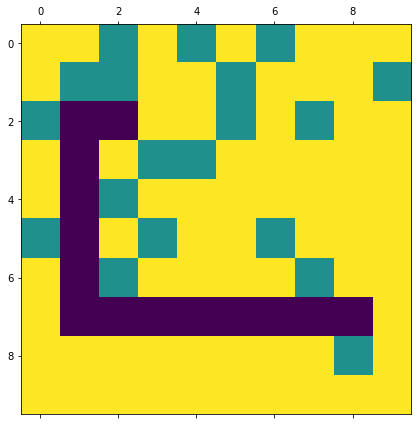

In [15]:
import matplotlib.pyplot as plt

# static display of full path

matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1

plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')

### Agent with goals

In [ ]:
path = agent.goal_oriented_loop(np.array([35,35]), np.array([0,0]), "bfs")[0]


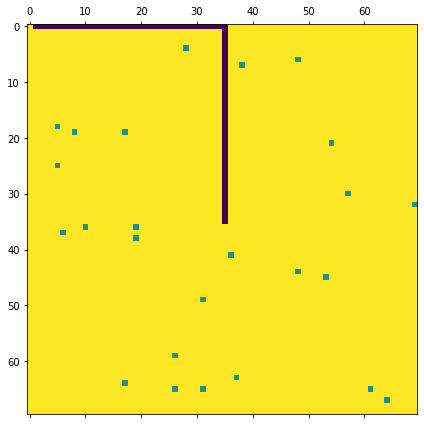

In [ ]:
# static display of full path

matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')

## EVALUATE THE AGENT'S PERFORMANCE

In [7]:
## Generate 10 random problems
import time

In [ ]:
# Breadth First Search (BFS)
list_time = []
visited_nodes = []
path_size = []

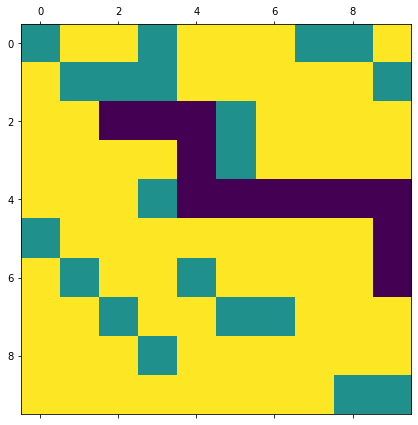

In [ ]:
start_time = time.time()
agent = Agent(10, 20)
l = agent.goal_oriented_loop(np.array([2, 2]), np.array([7, 9]), "bfs")
path = l[0]
matrix = agent.KB["cells"].copy()
for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time1 = end_time - start_time
list_time.append(elapsed_time1)
visited_nodes.append(l[1])
path_size.append(len(path))

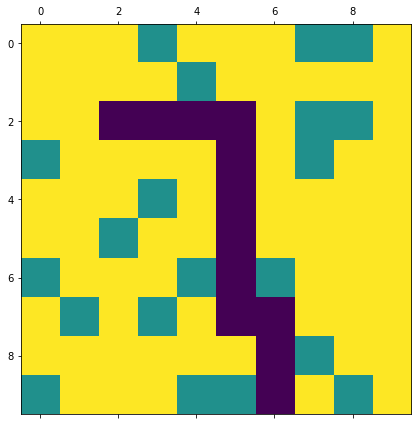

In [ ]:
start_time = time.time()
agent = Agent(10, 20)
l = agent.goal_oriented_loop(np.array([2, 2]), np.array([9, 7]), "bfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time2 = end_time - start_time
list_time.append(elapsed_time2)
visited_nodes.append(l[1])
path_size.append(len(path))

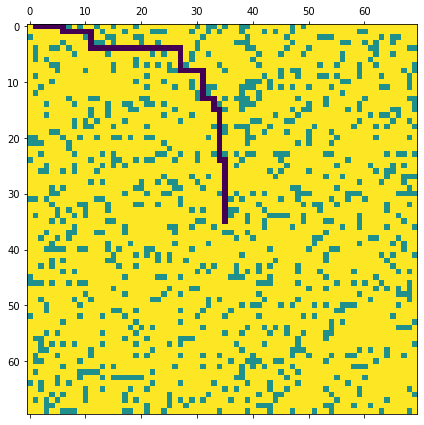

In [ ]:
start_time = time.time()
agent = Agent(70, 850)
l = agent.goal_oriented_loop(np.array([35,35]), np.array([0,0]), "bfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time3 = end_time - start_time
list_time.append(elapsed_time3)
visited_nodes.append(l[1])
path_size.append(len(path))

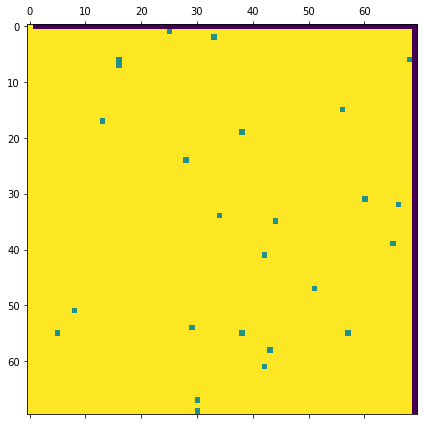

In [ ]:
start_time = time.time()
agent = Agent(70, 25)
l = agent.goal_oriented_loop(np.array([69, 69]), np.array([0,0]), "bfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time4 = end_time - start_time
list_time.append(elapsed_time4)
visited_nodes.append(l[1])
path_size.append(len(path))

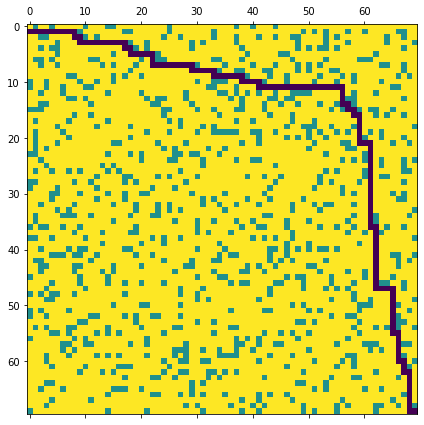

In [ ]:
start_time = time.time()
agent = Agent(70, 850)
l = agent.goal_oriented_loop(np.array([69, 69]), np.array([0,0]), "bfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time5 = end_time - start_time
list_time.append(elapsed_time5)
visited_nodes.append(l[1])
path_size.append(len(path))

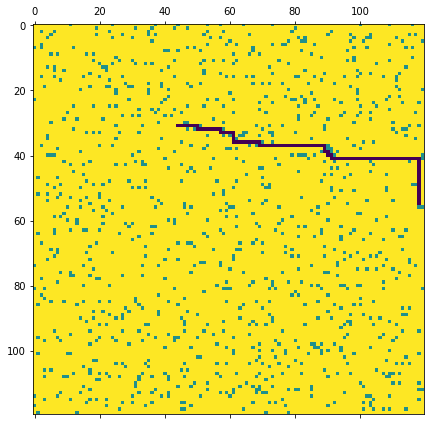

In [ ]:
start_time = time.time()
agent = Agent(120, 999)
l = agent.goal_oriented_loop(np.random.randint(0, 120, 2), np.random.randint(0, 120, 2), "bfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time6 = end_time - start_time
list_time.append(elapsed_time6)
visited_nodes.append(l[1])
path_size.append(len(path))

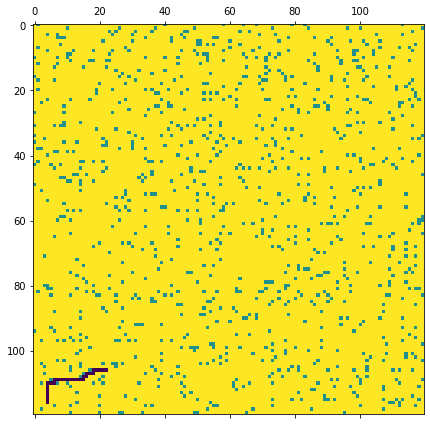

In [ ]:
start_time = time.time()
agent = Agent(120, 999)
l = agent.goal_oriented_loop(np.random.randint(0, 120, 2), np.random.randint(0, 120, 2), "bfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time7 = end_time - start_time
list_time.append(elapsed_time7)
visited_nodes.append(l[1])
path_size.append(len(path))

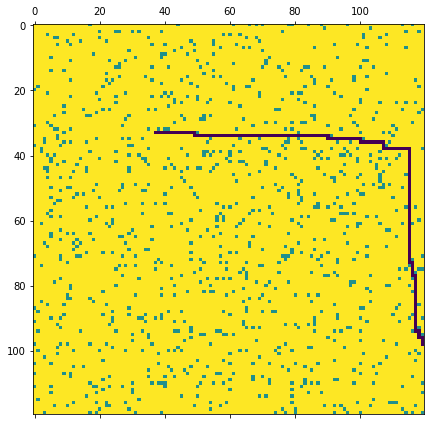

In [ ]:
start_time = time.time()
agent = Agent(120, 999)
l = agent.goal_oriented_loop(np.random.randint(0, 120, 2), np.random.randint(0, 120, 2), "bfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time8 = end_time - start_time
list_time.append(elapsed_time8)
visited_nodes.append(l[1])
path_size.append(len(path))

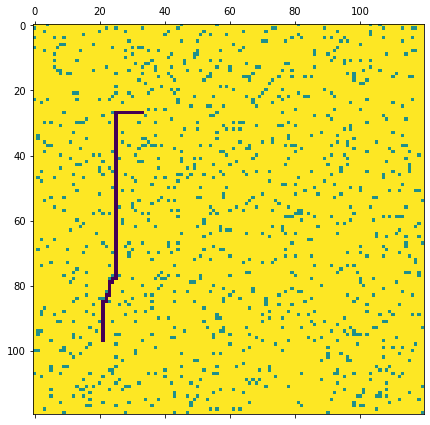

In [ ]:
start_time = time.time()
agent = Agent(120, 999)
l = agent.goal_oriented_loop(np.random.randint(0, 120, 2), np.random.randint(0, 120, 2), "bfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time9 = end_time - start_time
list_time.append(elapsed_time9)
visited_nodes.append(l[1])
path_size.append(len(path))

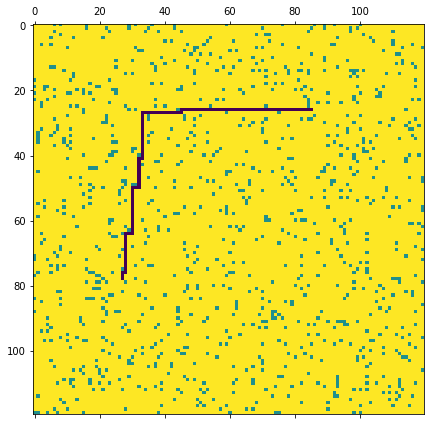

In [ ]:
start_time = time.time()
agent = Agent(120, 999)
l = agent.goal_oriented_loop(np.random.randint(0, 120, 2), np.random.randint(0, 120, 2), "bfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time10 = end_time - start_time
list_time.append(elapsed_time10)
visited_nodes.append(l[1])
path_size.append(len(path))

In [ ]:
print("Mean of time: ", np.mean(list_time))
print("Mean of visisted nodes visited: ", np.mean(visited_nodes))
print("Mean of path size: ", np.mean(path_size))

Mean of time:  11.465834140777588
Mean of visisted nodes visited:  19914.0
Mean of path size:  84.0


In [ ]:
# Depth First Search (DFS)
list_time = []
visited_nodes = []
path_size = []

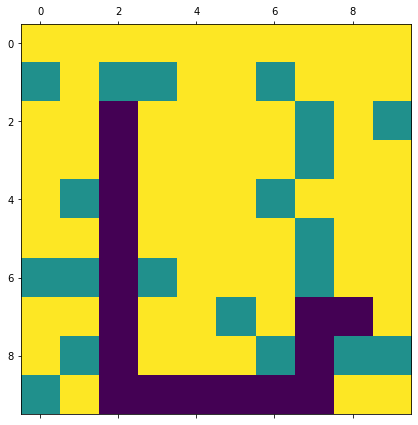

In [ ]:
start_time = time.time()
agent = Agent(10, 20)
l = agent.goal_oriented_loop(np.array([2, 2]), np.array([7, 9]), "dfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time1 = end_time - start_time
list_time.append(elapsed_time1)
visited_nodes.append(l[1])
path_size.append(len(path))

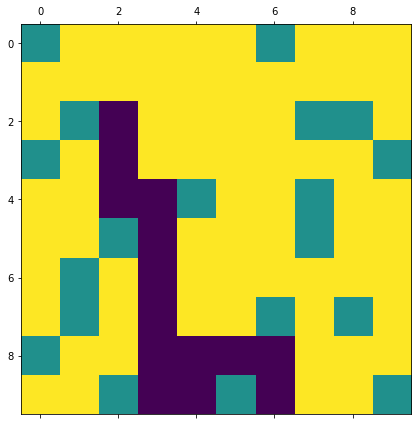

In [ ]:
start_time = time.time()
agent = Agent(10, 20)
l = agent.goal_oriented_loop(np.array([2, 2]), np.array([9, 7]), "dfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time2 = end_time - start_time
list_time.append(elapsed_time2)
visited_nodes.append(l[1])
path_size.append(len(path))

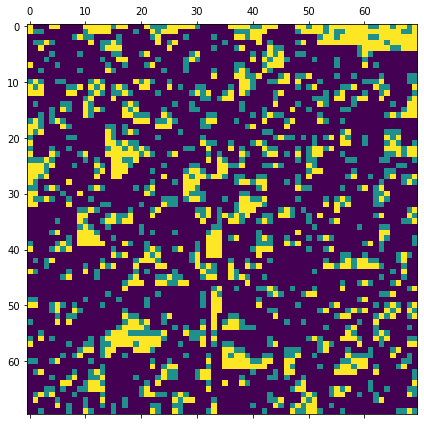

In [ ]:
start_time = time.time()
agent = Agent(70, 850)
l = agent.goal_oriented_loop(np.array([35,35]), np.array([0,0]), "dfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time3 = end_time - start_time
list_time.append(elapsed_time3)
visited_nodes.append(l[1])
path_size.append(len(path))

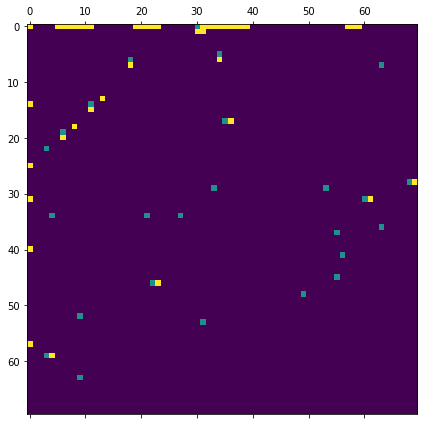

In [ ]:
start_time = time.time()
agent = Agent(70, 25)
l = agent.goal_oriented_loop(np.array([69, 69]), np.array([0,0]), "dfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time4 = end_time - start_time
list_time.append(elapsed_time4)
visited_nodes.append(l[1])
path_size.append(len(path))

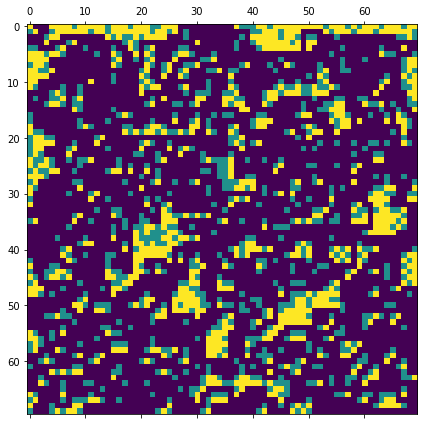

In [ ]:
start_time = time.time()
agent = Agent(70, 850)
l = agent.goal_oriented_loop(np.array([69, 69]), np.array([0,0]), "dfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time5 = end_time - start_time
list_time.append(elapsed_time5)
visited_nodes.append(l[1])
path_size.append(len(path))

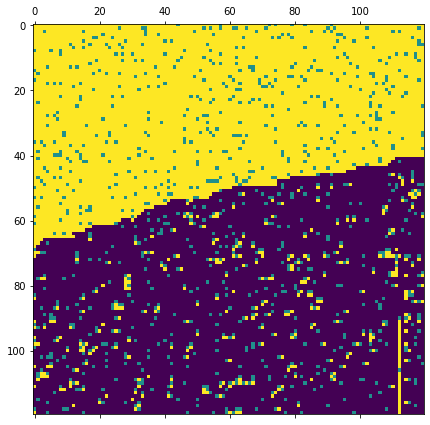

In [ ]:
start_time = time.time()
agent = Agent(120, 999)
l = agent.goal_oriented_loop(np.random.randint(0, 120, 2), np.random.randint(0, 120, 2), "dfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time6 = end_time - start_time
list_time.append(elapsed_time6)
visited_nodes.append(l[1])
path_size.append(len(path))

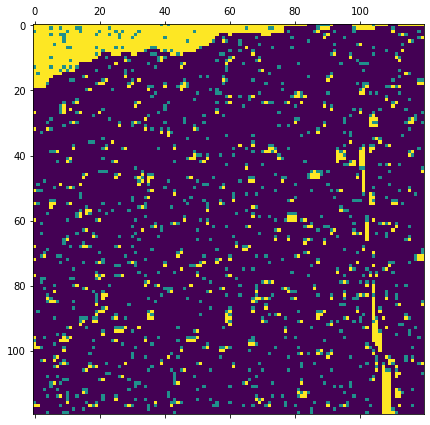

In [ ]:
start_time = time.time()
agent = Agent(120, 999)
l = agent.goal_oriented_loop(np.random.randint(0, 120, 2), np.random.randint(0, 120, 2), "dfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time7 = end_time - start_time
list_time.append(elapsed_time7)
visited_nodes.append(l[1])
path_size.append(len(path))

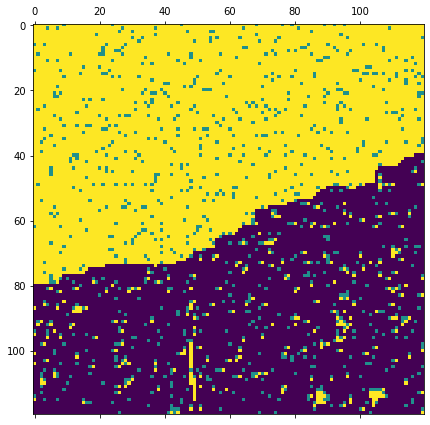

In [ ]:
start_time = time.time()
agent = Agent(120, 999)
l = agent.goal_oriented_loop(np.random.randint(0, 120, 2), np.random.randint(0, 120, 2), "dfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time8 = end_time - start_time
list_time.append(elapsed_time8)
visited_nodes.append(l[1])
path_size.append(len(path))

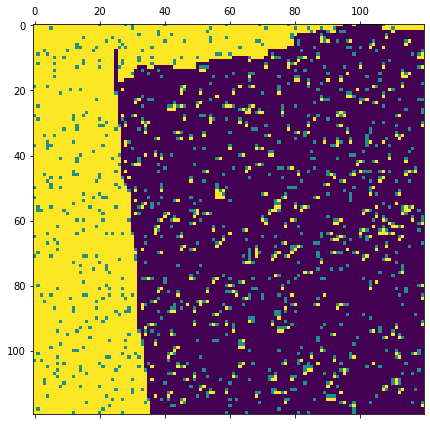

In [ ]:
start_time = time.time()
agent = Agent(120, 999)
l = agent.goal_oriented_loop(np.random.randint(0, 120, 2), np.random.randint(0, 120, 2), "dfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time9 = end_time - start_time
list_time.append(elapsed_time9)
visited_nodes.append(l[1])
path_size.append(len(path))

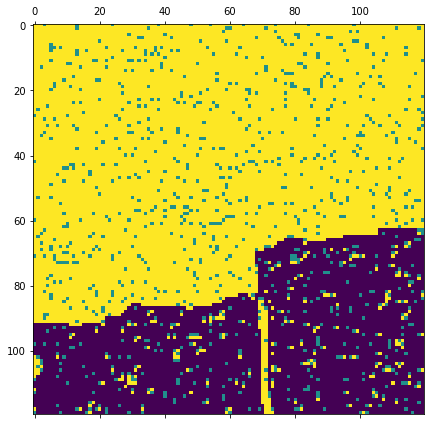

In [ ]:
start_time = time.time()
agent = Agent(120, 999)
l = agent.goal_oriented_loop(np.random.randint(0, 120, 2), np.random.randint(0, 120, 2), "dfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time10 = end_time - start_time
list_time.append(elapsed_time10)
visited_nodes.append(l[1])
path_size.append(len(path))

In [ ]:
print("Mean of time: ", np.mean(list_time))
print("Mean of visisted nodes visited: ", np.mean(visited_nodes))
print("Mean of path size: ", np.mean(path_size))

Mean of time:  9.49481179714203
Mean of visisted nodes visited:  13587.9
Mean of path size:  5022.1


In [8]:
# Breadth First Search with cost (Cost-BFS)
list_time = []
visited_nodes = []
path_size = []

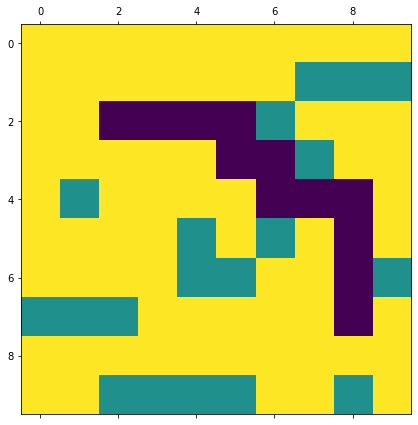

In [16]:
start_time = time.time()
agent = Agent(10, 20)
l = agent.goal_oriented_loop(np.array([2, 2]), np.array([7, 9]), "cost_bfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time1 = end_time - start_time
list_time.append(elapsed_time1)
visited_nodes.append(l[1])
path_size.append(len(path))

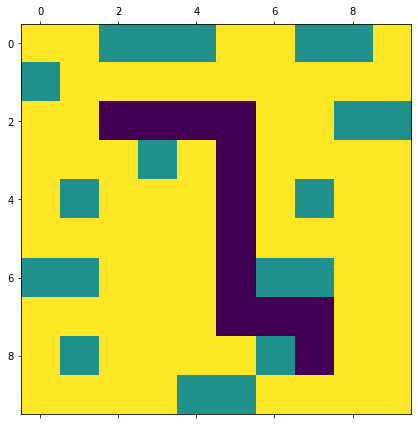

In [29]:
start_time = time.time()
agent = Agent(10, 20)
l = agent.goal_oriented_loop(np.array([2, 2]), np.array([9, 7]), "cost_bfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time2 = end_time - start_time
list_time.append(elapsed_time2)
visited_nodes.append(l[1])
path_size.append(len(path))

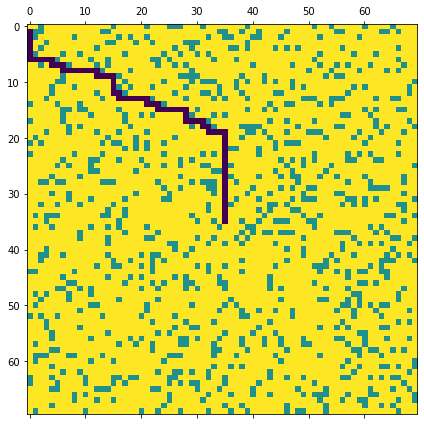

In [19]:
start_time = time.time()
agent = Agent(70, 850)
l = agent.goal_oriented_loop(np.array([35,35]), np.array([0,0]), "cost_bfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time3 = end_time - start_time
list_time.append(elapsed_time3)
visited_nodes.append(l[1])
path_size.append(len(path))

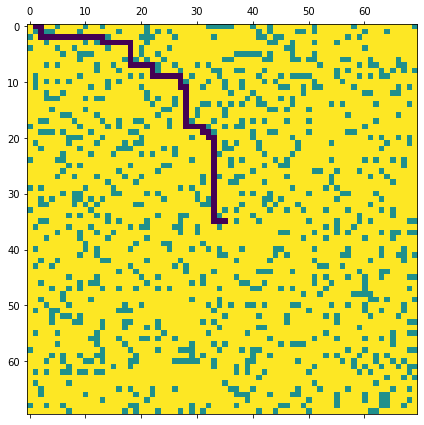

In [20]:
start_time = time.time()
agent = Agent(70, 850)
l = agent.goal_oriented_loop(np.array([35,35]), np.array([0,0]), "cost_bfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time3 = end_time - start_time
list_time.append(elapsed_time3)
visited_nodes.append(l[1])
path_size.append(len(path))

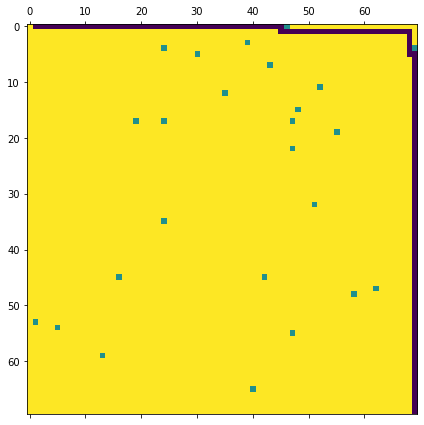

In [21]:
start_time = time.time()
agent = Agent(70, 25)
l = agent.goal_oriented_loop(np.array([69, 69]), np.array([0,0]), "cost_bfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time4 = end_time - start_time
list_time.append(elapsed_time4)
visited_nodes.append(l[1])
path_size.append(len(path))

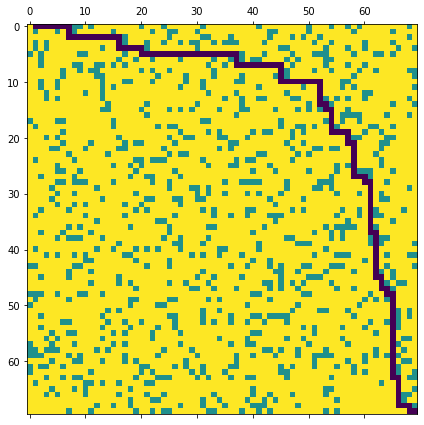

In [22]:
start_time = time.time()
agent = Agent(70, 850)
l = agent.goal_oriented_loop(np.array([69, 69]), np.array([0,0]), "cost_bfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time5 = end_time - start_time
list_time.append(elapsed_time5)
visited_nodes.append(l[1])
path_size.append(len(path))

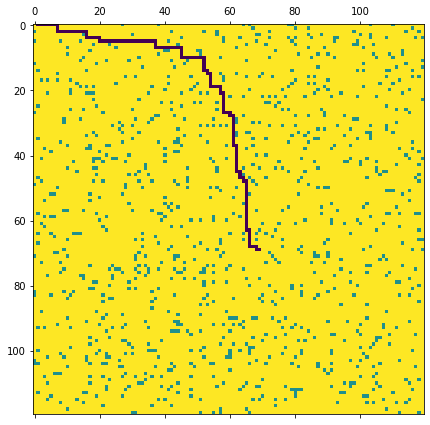

In [23]:
start_time = time.time()
agent = Agent(120, 999)
l = agent.goal_oriented_loop(np.random.randint(0, 120, 2), np.random.randint(0, 120, 2), "cost_bfs")
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time6 = end_time - start_time
list_time.append(elapsed_time6)
visited_nodes.append(l[1])
path_size.append(len(path))

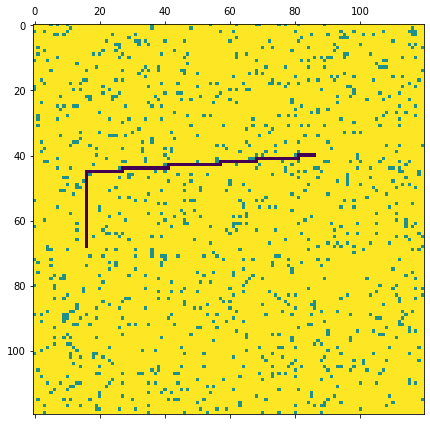

In [24]:
start_time = time.time()
agent = Agent(120, 999)
l = agent.goal_oriented_loop(np.random.randint(0, 120, 2), np.random.randint(0, 120, 2), "cost_bfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time7 = end_time - start_time
list_time.append(elapsed_time7)
visited_nodes.append(l[1])
path_size.append(len(path))

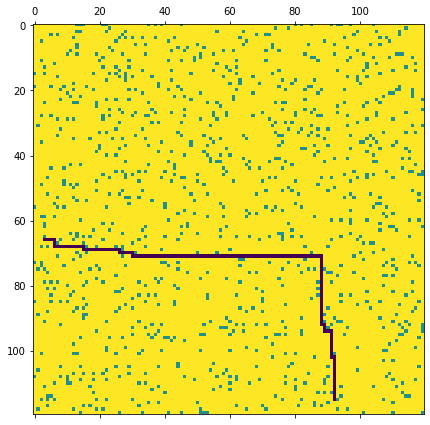

In [25]:
start_time = time.time()
agent = Agent(120, 999)
l = agent.goal_oriented_loop(np.random.randint(0, 120, 2), np.random.randint(0, 120, 2), "cost_bfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time8 = end_time - start_time
list_time.append(elapsed_time8)
visited_nodes.append(l[1])
path_size.append(len(path))

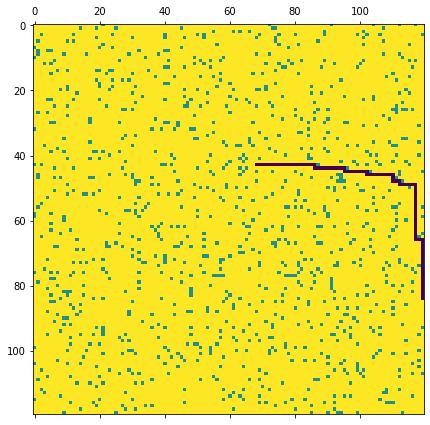

In [26]:
start_time = time.time()
agent = Agent(120, 999)
l = agent.goal_oriented_loop(np.random.randint(0, 120, 2), np.random.randint(0, 120, 2), "cost_bfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time9 = end_time - start_time
list_time.append(elapsed_time9)
visited_nodes.append(l[1])
path_size.append(len(path))

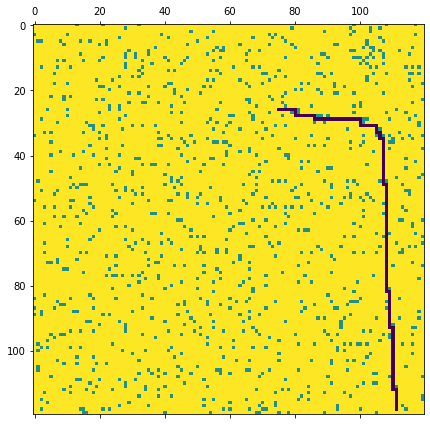

In [27]:
start_time = time.time()
agent = Agent(120, 999)
l = agent.goal_oriented_loop(np.random.randint(0, 120, 2), np.random.randint(0, 120, 2), "cost_bfs")
path = l[0]
matrix = agent.KB["cells"].copy()

for (i, p) in enumerate(path):
  matrix[p[0]][p[1]] = -1
plt.figure(figsize=(7,7))
plt.matshow(matrix, fignum=1, aspect='auto')
end_time = time.time()
elapsed_time10 = end_time - start_time
list_time.append(elapsed_time10)
visited_nodes.append(l[1])
path_size.append(len(path))

In [28]:
print("Mean of time: ", np.mean(list_time))
print("Mean of visisted nodes visited: ", np.mean(visited_nodes))
print("Mean of path size: ", np.mean(path_size))

Mean of time:  18.537695624611594
Mean of visisted nodes visited:  22650.545454545456
Mean of path size:  94.36363636363636
